# Linear Regression & Multiple Linear Regression  (Chapters 4 & 5)

+ Data - [Kaggle Dataset - Soccer players values and their statistics](https://www.kaggle.com/datasets/kriegsmaschine/soccer-players-values-and-their-statistics)
+ Reference Kaggle Analysis Notebooks
    + https://www.kaggle.com/code/jonascarette/football-price-prediction-cbbc06

In [32]:
library(ggplot2)
library(rethinking)
library(dplyr)
library(GGally)
options(repr.matrix.max.cols=150, repr.matrix.max.rows=200)
setwd("/media/david/T7/code/statistical-rethinking")
SAMPLE_DATA_DIR = 'sample-data/'

In [33]:
df <- read.csv(file=file.path('data/kaggle-soccer-players-values-and-their-statistics/transfermarkt_fbref_201718.csv'),
              sep=';')
df <- select(df, 'player','value','nationality','position','position2', 'squad','goals','goals_per_shot',
             'passes_completed','assisted_shots','passes_blocked','tackles_won','dribbled_past',
             'touches','age','height','assists','cards_yellow','games_starts','minutes')
head(df)

,player,value,nationality,position,position2,squad,goals,goals_per_shot,passes_completed,assisted_shots,passes_blocked,tackles_won,dribbled_past,touches,age,height,assists,cards_yellow,games_starts,minutes
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Burgui,1800000,es ESP,"FW,MF",attack - Left Winger,Alavés,1,0.07,264,17,22,7,4,463,23,186,1,1,12,1037
2,Raphaël Varane,70000000,fr FRA,DF,Defender - Centre-Back,Real Madrid,0,0.00,1169,6,12,14,10,1504,24,191,1,3,27,2320
3,Rubén Duarte,2000000,es ESP,DF,Defender - Left-Back,Alavés,0,0.00,660,18,25,29,31,1217,21,179,2,9,24,2138
4,Samuel Umtiti,60000000,fr FRA,DF,Defender - Centre-Back,Barcelona,1,0.09,1435,1,23,26,11,1768,23,182,0,7,24,2189
5,Manu García,1800000,es ESP,MF,midfield - Defensive Midfield,Alavés,3,0.12,724,15,27,69,58,1327,31,183,0,9,27,2438
6,Ibai Gómez,3500000,es ESP,"MF,FW",attack - Right Winger,Alavés,7,0.12,616,38,28,11,14,1206,27,178,6,1,26,2315


In [34]:
precis(df)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
player,NaN,NA,NA,NA,
value,9.594643e+06,1.668863e+07,40000.000,40000000.00,▇▁▁▁▁▁▁▁▁
nationality,NaN,NA,NA,NA,
position,NaN,NA,NA,NA,
position2,NaN,NA,NA,NA,
squad,NaN,NA,NA,NA,
goals,1.845430e+00,3.540359e+00,0.000,8.00,▇▁▁▁▁▁▁
goals_per_shot,6.592742e-02,1.047434e-01,0.000,0.23,▇▂▁▁▁▁▁▁▁▁
passes_completed,5.217258e+02,4.718677e+02,12.705,1405.18,▇▃▂▁▁▁


## Single variable Regression
+ Target variable is value (I guess this is transfer value) - ranges from 40,000 to an incedible 40,000,000
+ In theory a players performance should be related to their value
+ But a defender provides value by defending and moving the ball up the pitch whereas an attacker provides value by either setting up or scoring goals
+ start by graphing data

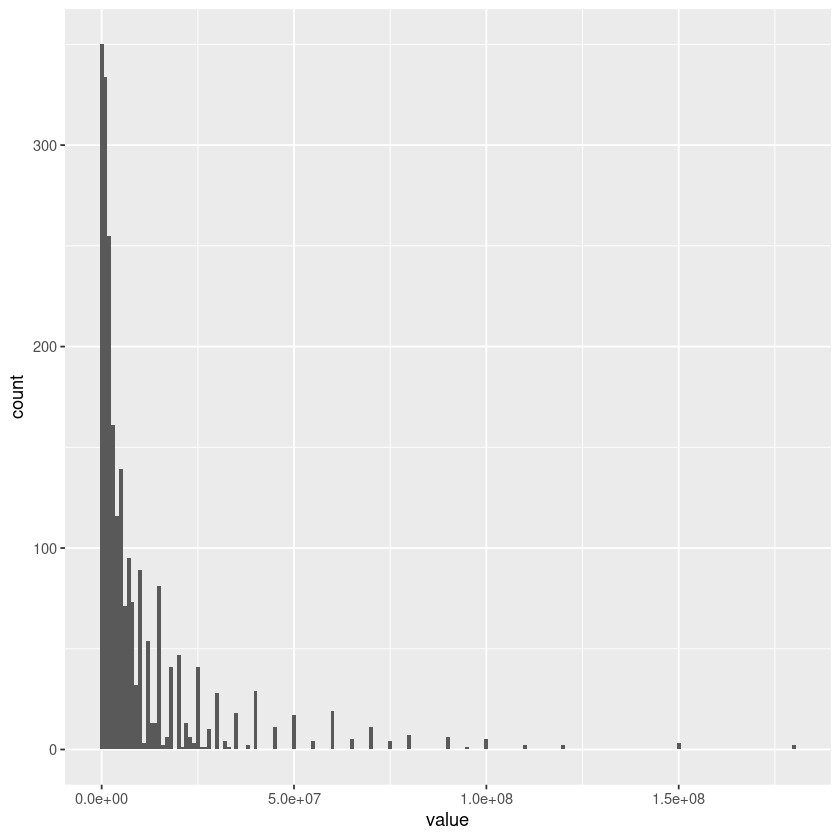

In [35]:
ggplot(data=df, aes(x=value)) +
    geom_histogram(binwidth=1000000)

In [36]:
# df[, c('value')] <- log(df[, c('value')])

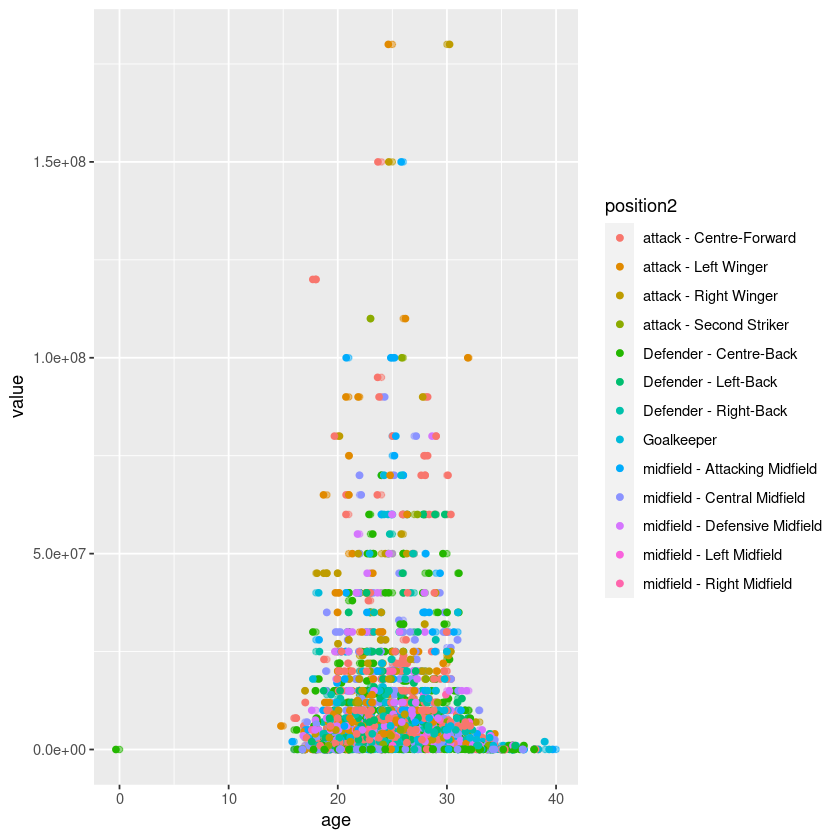

In [37]:
ggplot(data=df, aes(x=age, y=value, color=position2)) +
    geom_point(alpha=0.5) + geom_jitter()

In [38]:
df_cf <- df[df$position2 == 'attack - Centre-Forward',]
dim(df_cf)

[1] 324  20

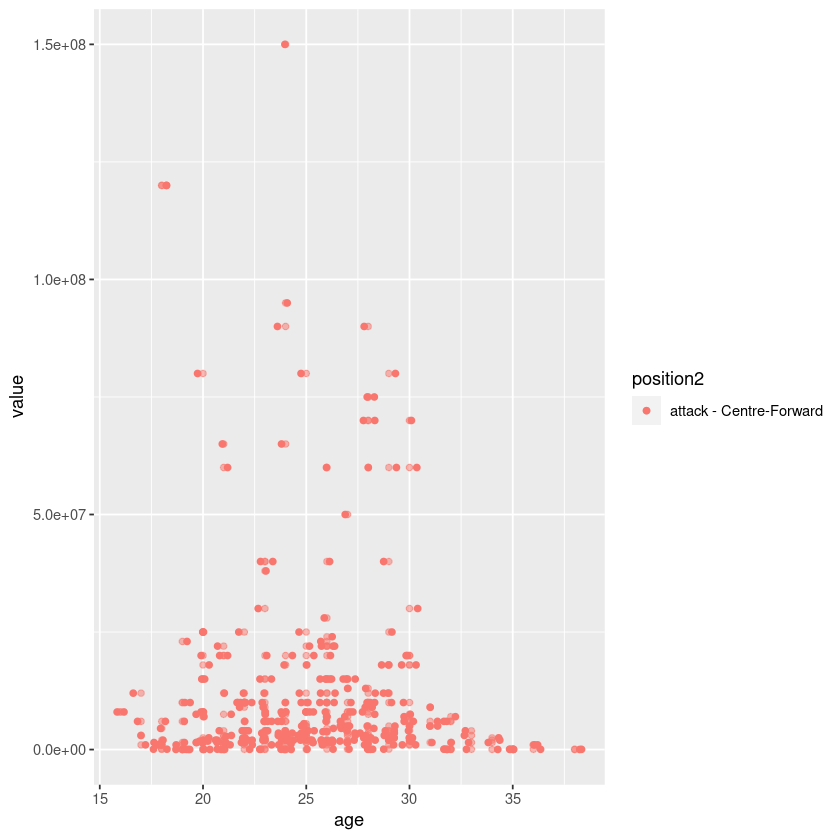

In [39]:
ggplot(data=df_cf, aes(x=age, y=value, color=position2)) +
    geom_point(alpha=0.5) + geom_jitter()

## value Scale
+ I think that value probably goes up in more of an exponential way than a linear way. The best ranked player is not worth 100 more than the 100th player, he is probably worth 1,000 more
+ take the log scale of value and see what happens 

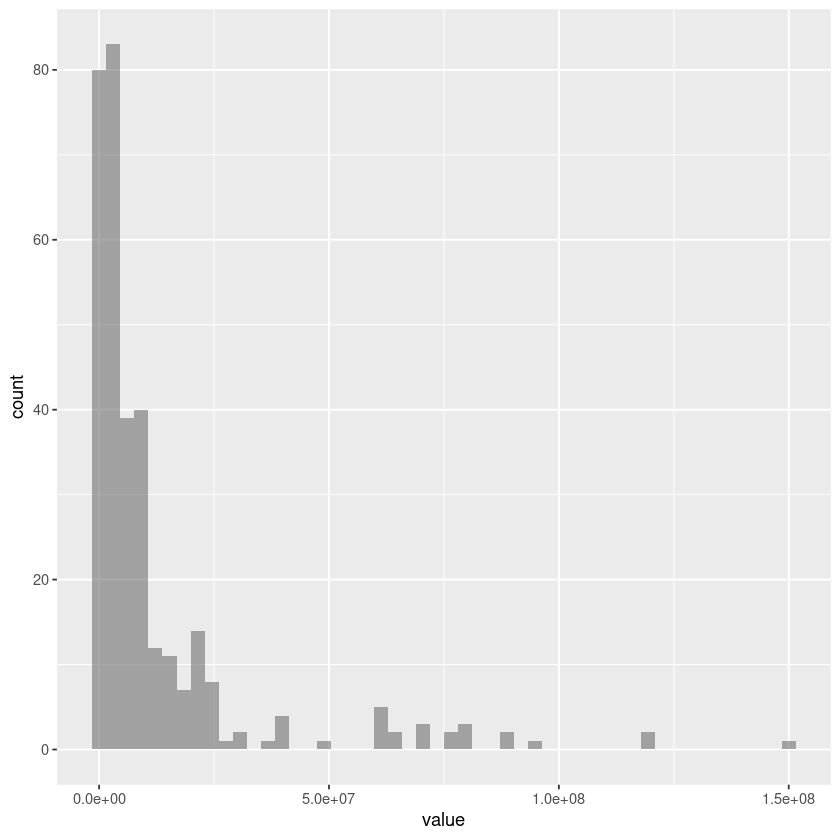

In [40]:
ggplot(data=df_cf, aes(x=value)) +
    geom_histogram(alpha=0.5, bins=50)

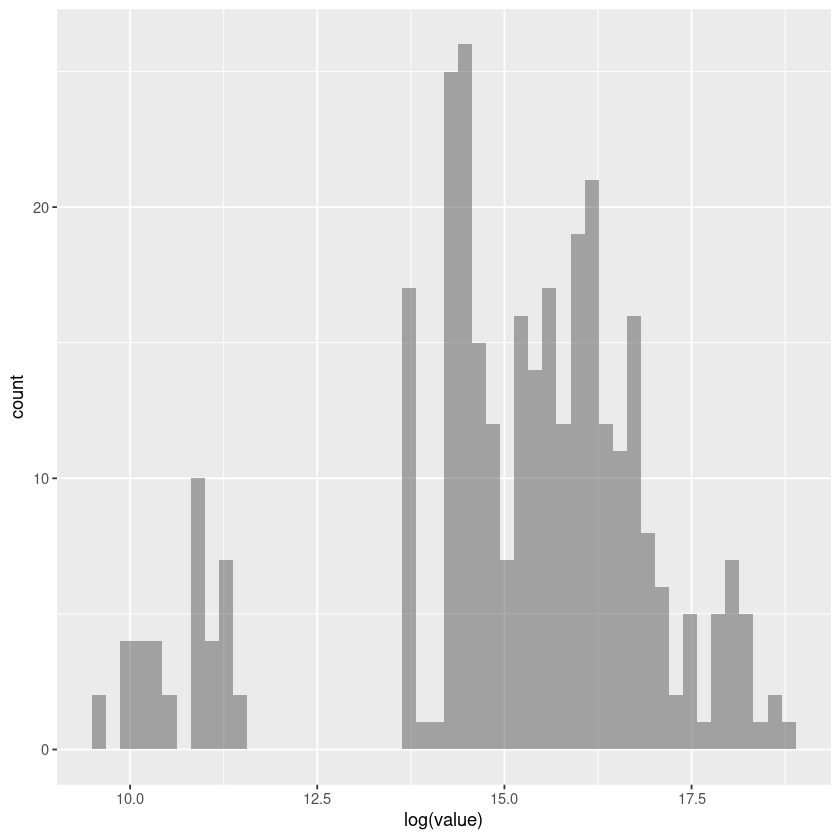

In [41]:
# take natural log of value
ggplot(data=df_cf, aes(x=log(value))) +
    geom_histogram(alpha=0.5, bins=50)

+ it looks like there are some anchor points in the data - round prices, probably at numbers like 1,000,000 & 2,000,000 & 5,000,000 etc
+ It seems like there is a natural break in the data at 12.5 where e^12.5 = 268337, so I'll filter the data to remove players with a value of less than 250,000

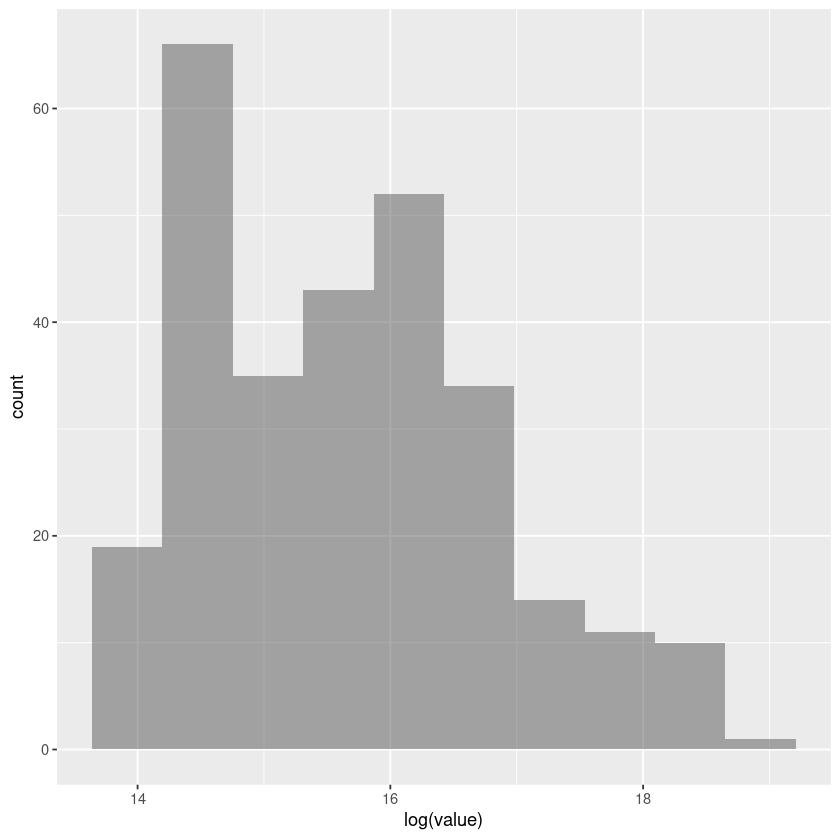

In [42]:
# df_cf1 = select(df_cf, )
df_cf1 <- df_cf[df_cf$value > 250000,]
ggplot(data=df_cf1, aes(x=log(value))) +
    geom_histogram(alpha=0.5, bins=10)

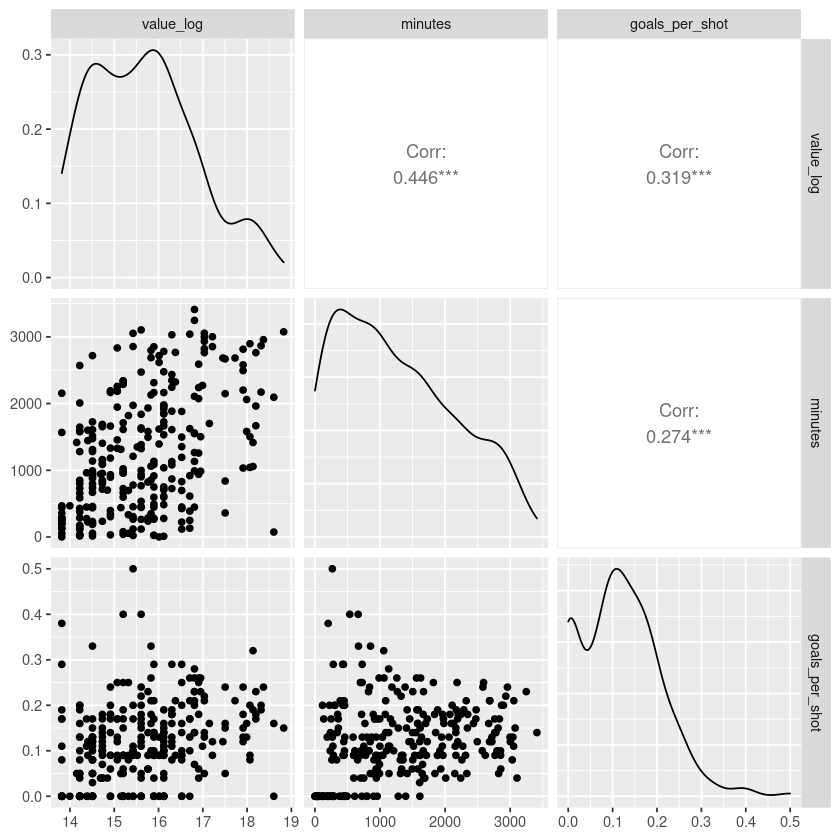

In [43]:
# take the log of value before going further
df_cf1$value_log = log(df_cf1[, c('value')])
# pairs plot of 3 possible related variables
ggpairs(df_cf1, columns = c('value_log', 'minutes', 'goals_per_shot'))

+ It looks like (purely from graphs alone):
    + as value goes up goals per shot goes up - V UP, GPS UP
    + as minutes played goes up goals per shot goes up. - M UP, GPS UP This plot is maybe a bit deceptive because of the high spread of goals per shot at the low minutes value. More minutes on the pitch should lead to more shots, so the goals per shot number should be more reliable at higher minutes.
    + as value goes up, minutes go up. This make sense. No team pays millions for someone to sit on a bench

## DataFrame for Analysis
+ Filter to only center forward position 
+ Convert value from currency to log_e currency
+ Filter on values gt 250,000
+ Use columns, goals_per_shot, minutes, value
+ 285 values in the dataframe
+ Target variable is goals per shot
    + Higher value should lead to higher goals per shot
    + Higher value should cause more minutes on the pitch
    + Higher minutes should lead to a better assessment of goals per shot

In [44]:
df = select(df_cf1, value_log, minutes, goals_per_shot)
head(df)

,value_log,minutes,goals_per_shot
,<dbl>,<int>,<dbl>
7,15.42495,1210,0.10
8,16.30042,2436,0.16
18,13.81551,438,0.29
20,14.50866,1474,0.12
40,15.60727,2472,0.17
53,15.20180,1023,0.09


In [45]:
precis(df)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
value_log,15.6508659,1.18477767,13.81551,17.94027,▂▃▇▅▇▅▅▁▂▂▁
minutes,1253.0070175,894.89077150,67.54000,2852.38000,▇▅▃▃▂▂▁
goals_per_shot,0.1169123,0.08891131,0.00000,0.26000,▇▅▅▅▂▁▁▁▁▁


In [46]:
dim(df)

[1] 285   3

In [47]:
# Write the sample data to the sample data dir
save_filepath <- 'sample-data/soccer-player-value.csv'
write.csv(df, save_filepath, row.names=FALSE)
# Read the data back in
df <- read.csv(file=file.path(save_filepath),
              sep=',')
head(df)

,value_log,minutes,goals_per_shot
,<dbl>,<int>,<dbl>
1,15.42495,1210,0.10
2,16.30042,2436,0.16
3,13.81551,438,0.29
4,14.50866,1474,0.12
5,15.60727,2472,0.17
6,15.20180,1023,0.09


In [48]:
stop

function (..., call. = TRUE, domain = NULL) 
{
    if (...length() == 1L && inherits(..1, "condition")) {
        cond <- ..1
        if (nargs() > 1L) 
            warning("additional arguments ignored in stop()")
        message <- conditionMessage(cond)
        call <- conditionCall(cond)
        .Internal(.signalCondition(cond, message, call))
        .Internal(.dfltStop(message, call))
    }
    else .Internal(stop(call., .makeMessage(..., domain = domain)))
}
<bytecode: 0x55fade55f418>
<environment: namespace:base>

## Standardize the Data

In [49]:
df$GPS = standardize(df$goals_per_shot)
df$V = standardize(df$value_log)
df$M = standardize(df$minutes)
head(df)

,value_log,minutes,goals_per_shot,GPS,V,M
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,15.42495,1210,0.10,-0.19021518,-0.19068336,-0.0480584
2,16.30042,2436,0.16,0.48461460,0.54824747,1.3219412
3,13.81551,438,0.29,1.94674579,-1.54911368,-0.9107335
4,14.50866,1474,0.12,0.03472808,-0.96406959,0.2469497
5,15.60727,2472,0.17,0.59708623,-0.03679663,1.3621696
6,15.20180,1023,0.09,-0.30268681,-0.37902549,-0.2570224


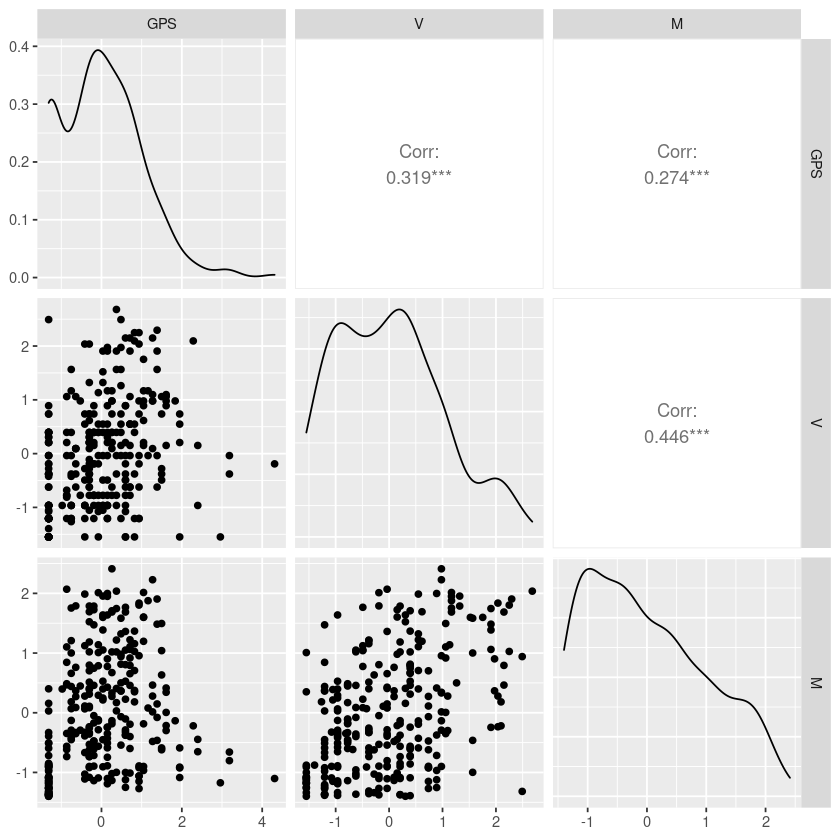

In [50]:
# # take the log of value before going further
# df_cf1$value_log = log(df_cf1[, c('value')])
# # pairs plot of 3 possible related variables
ggpairs(df, columns = c('GPS', 'V', 'M'))

## Single Variable Linear Regressions
### Player Value should drive Goals per Minute 

## Define the Model

In [51]:
m1.0 = quap(
    alist(
        GPS ~ dnorm(mu, sigma),
        mu <- a + bV * V,
        a ~ dnorm(0, 0.2),
        bV ~ dnorm(0, 0.5),
        sigma ~ dexp(1)
    ), data=df)

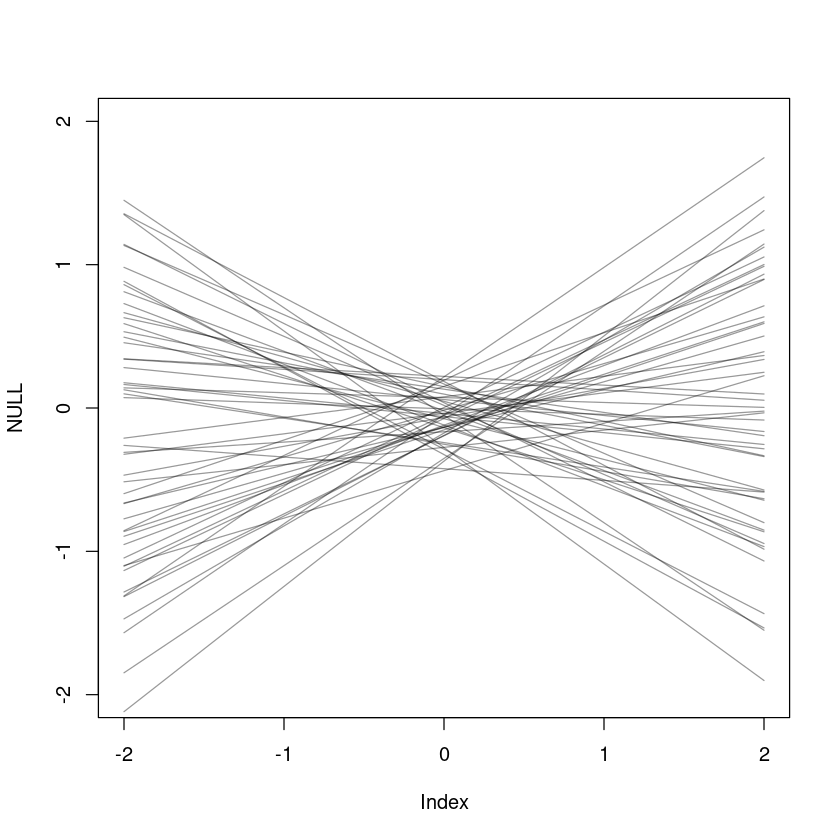

In [52]:
set.seed(10)
prior <- extract.prior( m1.0 )
mu <- link( m1.0 , post=prior , data=list( V=c(-2,2) ) )
plot( NULL , xlim=c(-2,2) , ylim=c(-2,2) )
for ( i in 1:50 ) lines( c(-2,2) , mu[i,] , col=col.alpha("black",0.4) )

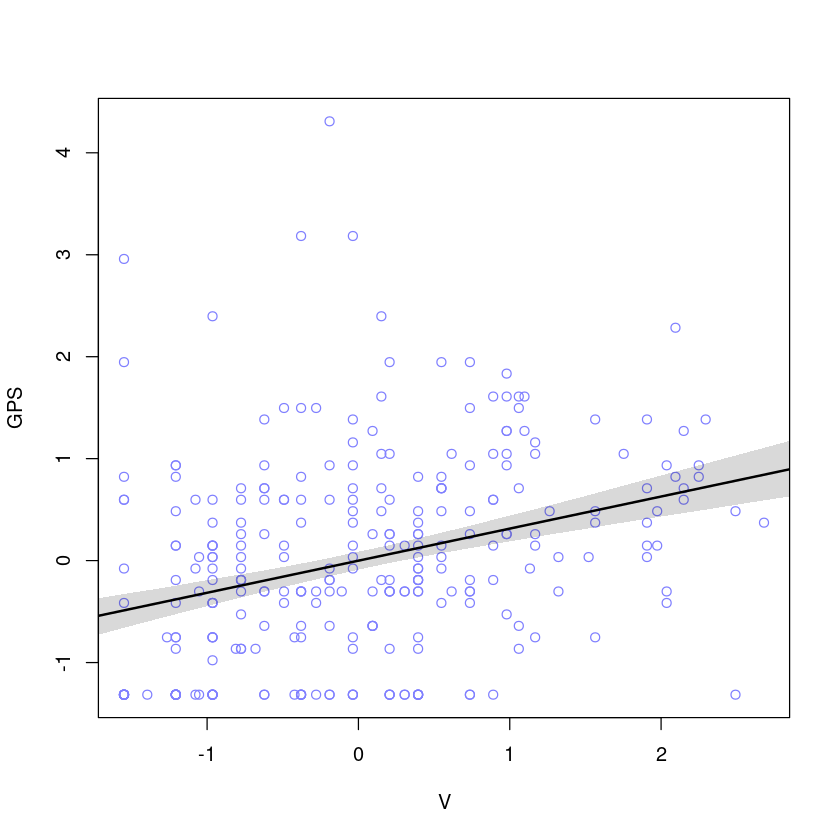

In [53]:
# compute percentile interval of mean
V_seq <- seq(from=-3, to=3.2, length.out=30 )
mu <- link( m1.0, data=list(V=V_seq))
mu.mean <- apply( mu , 2, mean )
mu.PI <- apply( mu , 2 , PI )

# plot it all
plot( GPS ~ V , data=df , col=rangi2 )
lines( V_seq , mu.mean , lwd=2 )
shade( mu.PI , V_seq )

In [54]:
precis(m1.0)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-9.460505e-07,0.05387825,-0.0861088,0.08610691
bV,3.151207e-01,0.05569713,0.2261060,0.40413550
sigma,9.444865e-01,0.03946133,0.8814197,1.00755333


### Value should drive Minutes on Pitch

In [55]:
m1.1 = quap(
    alist(
        M ~ dnorm(mu, sigma),
        mu <- a + bV * V,
        a ~ dnorm(0, 0.2),
        bV ~ dnorm(0, 0.5),
        sigma ~ dexp(1)
    ), data=df)

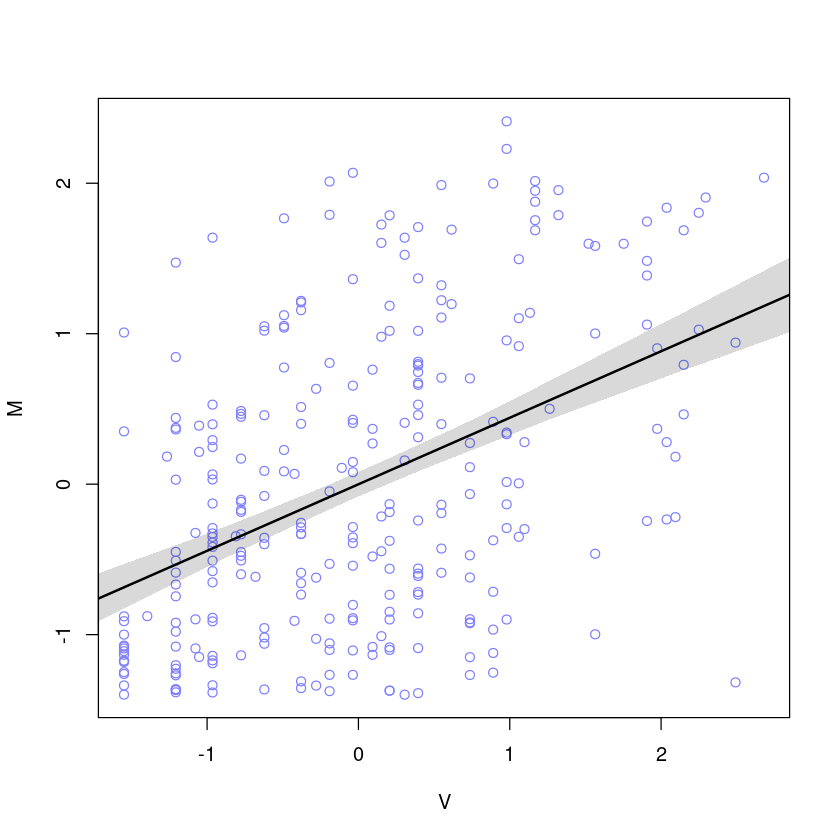

In [56]:
# compute percentile interval of mean
V_seq <- seq(from=-3, to=3.2, length.out=30 )
mu <- link( m1.1, data=list(V=V_seq))
mu.mean <- apply( mu , 2, mean )
mu.PI <- apply( mu , 2 , PI )

# plot it all
plot( M ~ V , data=df , col=rangi2 )
lines( V_seq , mu.mean , lwd=2 )
shade( mu.PI , V_seq )

In [57]:
precis(m1.1)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-7.952351e-06,0.05108810,-0.08165661,0.08164071
bV,4.410734e-01,0.05264147,0.35694218,0.52520464
sigma,8.920608e-01,0.03727635,0.83248600,0.95163560


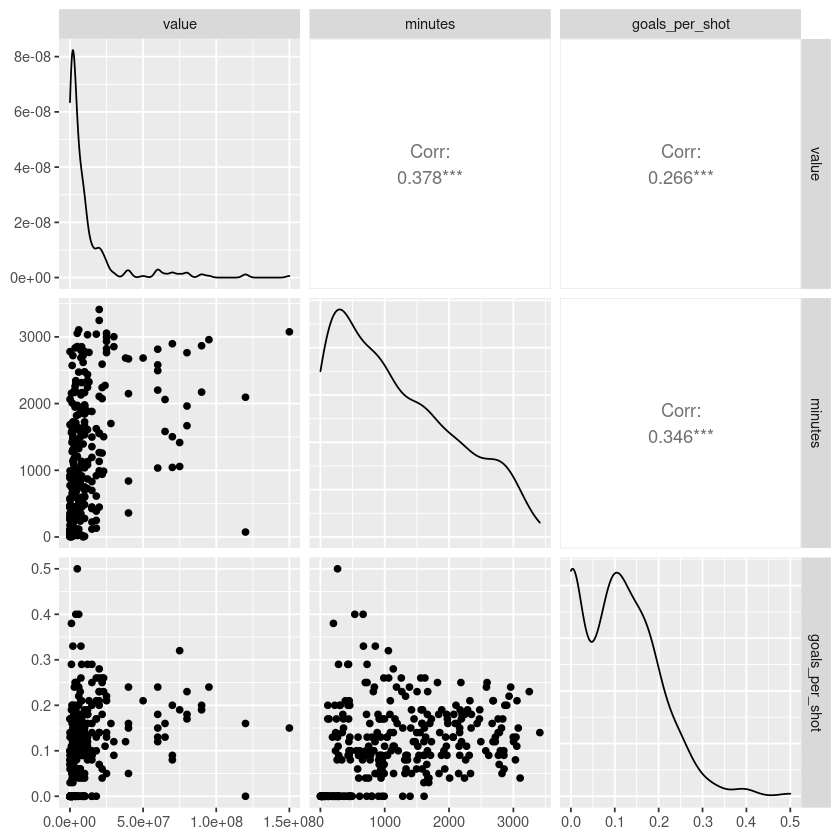

In [59]:
ggpairs(df_cf, columns = c('value', 'minutes', 'goals_per_shot'))

In [60]:
# df_cf[, c('value')] <- log(df_cf[, c('value')])
# ggplot(data=df_cf, aes(x=age, y=value, color=position2)) +
#     geom_point(alpha=0.5) + geom_jitter()

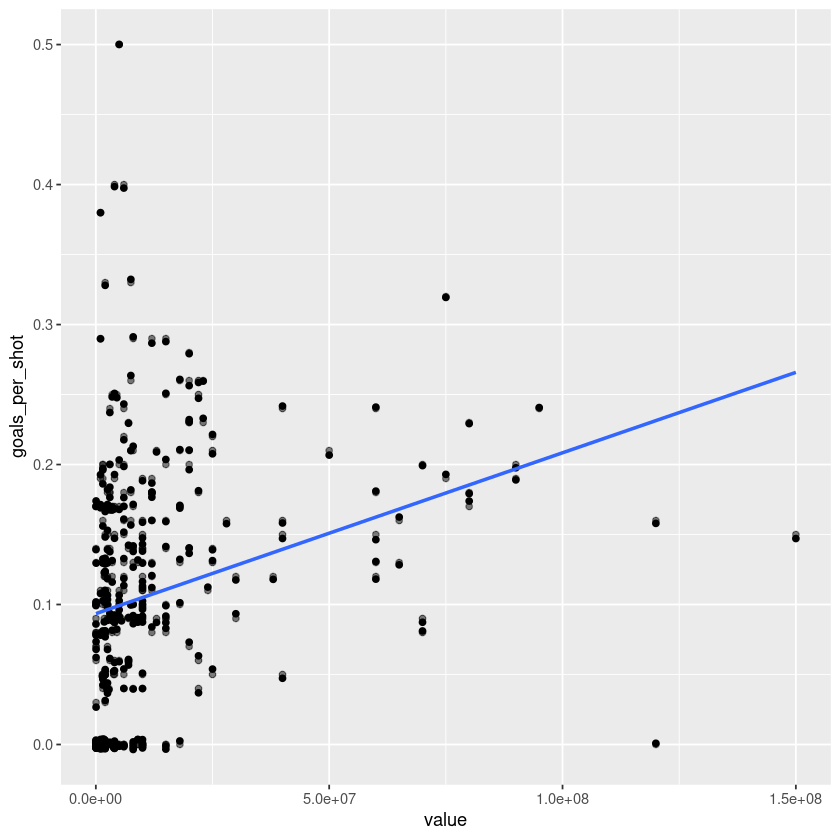

In [61]:
ggplot(data=df_cf, aes(x=value, y=goals_per_shot)) +
    geom_point(alpha=0.5) + geom_jitter() +
    geom_smooth(method='lm', se=F, formula=y~x)

In [62]:
df[, c('value')] <- log(df[, c('value')])

ERROR: Error in `[.data.frame`(df, , c("value")): undefined columns selected


In [ ]:
ggplot(data=df_cf, aes(x=minutes, y=goals_per_shot)) +
    geom_point(alpha=0.5) + geom_jitter() +
    geom_smooth(method='lm', se=F, formula=y~x)

In [ ]:
ggpairs(df_cf, columns = c('value', 'minutes', 'goals_per_shot'))

In [ ]:
cor(select(df_cf, goals_per_shot, value, minutes))

+ It looks like (purely from graphs alone):
    + as value goes up goals per shot goes up
    + as minutes played goes up goals per shot goes up. there is a fair weight of 0 goals per shot that drag the left hand side down)
    + as value goes up maybe minutes played goes up
    + there is a natural division in log value
+ maybe we can break the value at about 12.5 and just take the higher values. e^12.5 = 268337, so I will split the data at 250,000, and filter the dataframe to only these values.

remove the 
+ In terms of mcelreath's relationships
    + higher value paid for a center forward should predict higher goals per shot
    + higher value paid for a player should mean the guy plays more minutes. They are not paying millions for someone to sit on a bench!
    + more minutes on the pitch should lead to more shots, so the goals per shot number should be more reliable. But, let's say a player scores 1 goal for every 4 shots. That means if he comes on the pitch and shoots 4 times, he is likely to score one goal with a probability of ((1/4)^1 * (3/4)^3) = 0.105. He will score 2 goals with a probability of ((0.25)^2 * (0.75)^2) etc. If he comes on the pitch and his time is limited, he might only get 2 shots (assume a constant rate of generating shots). In this case his probability of scoring on a shot is  =  